<a href="https://colab.research.google.com/github/shrishankar-desai/Rocket-Recommender-System/blob/main/wsproject_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rocket recommender system

In [ ]:
import pandas as pd
from datetime import datetime

event= pd.read_csv('events.csv')
event.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
event['timestamp'] = pd.to_datetime(event['timestamp'], unit='ms')
event.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


### abnormal user

In [ ]:
user_event_counts = event.groupby('visitorid').size().reset_index(name='event_count')
transaction_counts = event[event['event'] == 'transaction'].groupby('visitorid').size().reset_index(name='transaction_count')

In [ ]:
class abnormal_user:
    def bulk_users(self, event_count, count):
        freq=count.quantile(0.95)
        heavy_user=event_count[count>freq]
        return heavy_user

    def transaction_user(self, t_counts, count_t):
        t_freq= count_t.quantile(0.95)
        heavy_transaction=t_counts[count_t>t_freq]
        return heavy_transaction

In [ ]:
ab_user=abnormal_user()
abnormal_event=ab_user.bulk_users(user_event_counts, user_event_counts['event_count'])
abnormal_transaction=ab_user.transaction_user(transaction_counts, transaction_counts['transaction_count'])

In [ ]:
abnormal_users=pd.merge(abnormal_event, abnormal_transaction, on='visitorid', how='outer')
abnormal_users.count()

visitorid            58654
event_count          58653
transaction_count      377
dtype: int64

<Axes: xlabel='event_count', ylabel='transaction_count'>

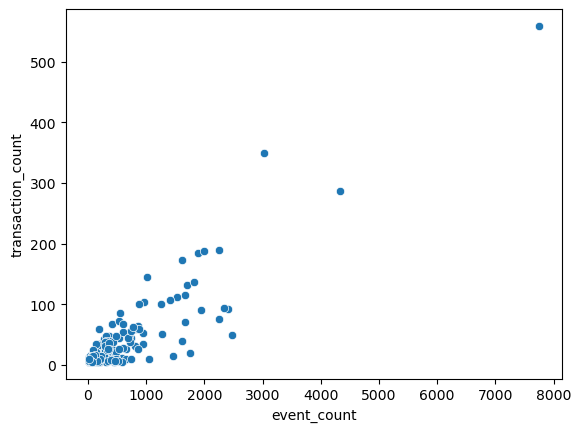

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='event_count', y='transaction_count', data=abnormal_users)

### EDA of Dataset

#### product analysis

In [ ]:
item1=pd.read_csv('item_properties_part1.csv')
item2=pd.read_csv('item_properties_part1.csv')

In [ ]:
items = pd.concat([item1, item2], axis=0)
items['timestamp'] = pd.to_datetime(event['timestamp'], unit='ms')
items = items.loc[items.property.isin(['categoryid', 'available']), :]
items.head()

,timestamp,itemid,property,value
0,2015-06-02 05:02:12.117,460429,categoryid,1338
5,2015-06-02 05:48:06.234,285026,available,0
15,2015-06-02 05:22:11.378,186518,available,0
79,2015-06-02 05:49:05.724,423682,available,0
82,2015-06-02 05:44:22.777,316253,available,1


In [ ]:
grouped = event.groupby('event')['itemid'].apply(list)
grouped

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object

In [ ]:
import numpy as np
import operator
def product_analysis(grouped_data):
    count={}
    grouped_array=np.array(grouped_data[:])
    unique, counts = np.unique(grouped_array, return_counts=True)
    count = dict(zip(unique, counts))
    sort_count=sorted(count.items(), key = operator.itemgetter(1), reverse = True)
    x = [i[0] for i in sort_count[:7]]
    y = [i[1] for i in sort_count[:7]]
    data_plot=sns.barplot(x=x, y=y, order=x, palette="pastel")
    return data_plot;

C:\Users\shank\AppData\Local\Temp\ipykernel_14800\851182760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data_plot=sns.barplot(x=x, y=y, order=x, palette="pastel")


Text(0, 0.5, 'VISITORS')

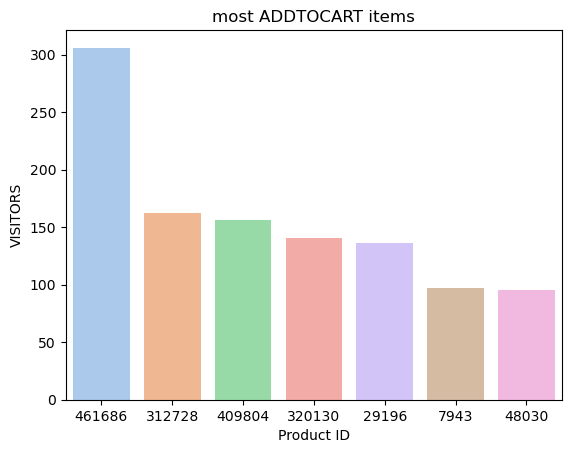

In [ ]:
add_cart=product_analysis(grouped['addtocart'])
add_cart.set_title("most ADDTOCART items")
add_cart.set_xlabel("Product ID")
add_cart.set_ylabel("VISITORS")

C:\Users\shank\AppData\Local\Temp\ipykernel_14800\851182760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data_plot=sns.barplot(x=x, y=y, order=x, palette="pastel")


Text(0, 0.5, 'VISITORS')

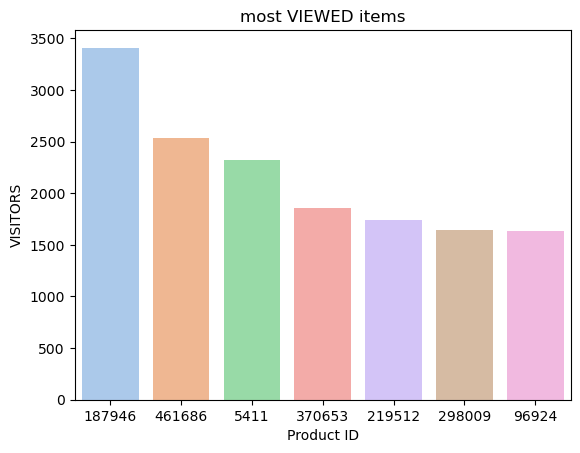

In [ ]:
viewed_item=product_analysis(grouped['view'])
viewed_item.set_title("most VIEWED items")
viewed_item.set_xlabel("Product ID")
viewed_item.set_ylabel("VISITORS")

C:\Users\shank\AppData\Local\Temp\ipykernel_14800\851182760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data_plot=sns.barplot(x=x, y=y, order=x, palette="pastel")


Text(0, 0.5, 'VISITORS')

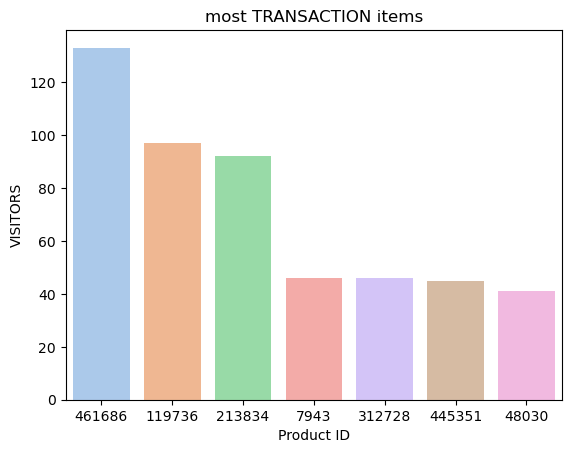

In [ ]:
trans=product_analysis(grouped['transaction'])
trans.set_title("most TRANSACTION items")
trans.set_xlabel("Product ID")
trans.set_ylabel("VISITORS")

#### customer analysis

In [ ]:
all_customers = event['visitorid'].unique()
print("Unique visitors:", all_customers.size)
print('Total visitors:', event['visitorid'].size)

Unique visitors: 1407580
Total visitors: 2756101


##### customers who bought something

In [ ]:
customer_purchased = event[event.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

##### visitors who didn't buy anything

In [ ]:
customer_browsed = [x for x in all_customers if x not in customer_purchased]
len(customer_browsed)

1395861

In [ ]:
customer_purchased = event[event.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

In [ ]:
import pandas as pd
data=pd.read_csv('merged_data1.csv')
data.head()

,timestamp,visitorid,event,itemid,transactionid,categoryid,parentid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,1173,805.0
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,1231,901.0
2,2015-06-02 05:12:35.914,483717,view,253185,NaN,914,226.0
3,2015-06-02 05:02:17.106,951259,view,367447,NaN,1613,250.0
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,491,679.0


In [ ]:
data.timestamp = data.timestamp.astype('datetime64[ns]')
data.sort_values(by=['visitorid','itemid', 'timestamp'])

,timestamp,visitorid,event,itemid,transactionid,categoryid,parentid
1338798,2015-09-11 20:55:17.175,0,view,67045,NaN,333,1497.0
1333375,2015-09-11 20:49:49.439,0,view,285930,NaN,1188,1497.0
1338670,2015-09-11 20:52:39.591,0,view,357564,NaN,256,1257.0
817585,2015-08-13 17:46:06.444,1,view,72028,NaN,1192,955.0
717304,2015-08-07 18:01:08.920,2,view,216305,NaN,299,73.0
...,...,...,...,...,...,...,...
204263,2015-06-10 21:46:08.922,1407575,view,121220,NaN,1221,1426.0
47148,2015-06-03 15:01:29.991,1407576,view,356208,NaN,175,1492.0
1728728,2015-05-17 21:48:04.867,1407577,view,427784,NaN,1237,623.0
1710517,2015-05-17 01:21:23.288,1407578,view,188736,NaN,1584,1562.0


##### Analyzes customer behavior based on their interactions with items.

In [ ]:
def analyze_customer_behavior(data):

    # Obtain visitor id, item id, and date time of 'transaction'
    item_tra = data[['visitorid', 'itemid', 'timestamp']][data['event'] == 'transaction']

    # Obtain visitor id, item id, and date time of 'add to cart'
    item_atc = data[['visitorid', 'itemid', 'timestamp']][data['event'] == 'addtocart']

    # Obtain visitor id, item id, and date time of 'view'
    item_viw = data[['visitorid', 'itemid', 'timestamp']][data['event'] == 'view']

    # Merge the DataFrames
    time_df = item_tra.merge(item_atc, how='inner', on=['visitorid', 'itemid'], suffixes=[' (transaction)', ' (add_to_cart)'])
    time_df = time_df.merge(item_viw, how='inner', on=['visitorid', 'itemid'])
    time_df = time_df.rename(columns={'timestamp': 'timestamp (view)'})

    # Calculate time differences
    time_df['cart_to_transaction'] = (time_df['timestamp (transaction)'] - time_df['timestamp (add_to_cart)']).apply(lambda x: x.total_seconds() / 3600)
    time_df['first_view'] = time_df.groupby('itemid')['timestamp (view)'].transform('min')
    time_df['firstview_to_cart'] = (time_df['timestamp (add_to_cart)'] - time_df['first_view']).apply(lambda x: x.total_seconds() / 3600)

    return time_df

In [ ]:
time_df=analyze_customer_behavior(data)
time_df.head()

,visitorid,itemid,timestamp (transaction),timestamp (add_to_cart),timestamp (view),cart_to_transaction,first_view,firstview_to_cart
0,599528,356475,2015-06-02 05:17:56.276,2015-06-02 05:12:21.632,2015-06-02 05:11:36.102,0.092957,2015-06-02 05:11:36.102,0.012647
1,599528,356475,2015-06-02 05:17:56.276,2015-06-02 05:12:21.632,2015-06-03 02:12:25.235,0.092957,2015-06-02 05:11:36.102,0.012647
2,599528,356475,2015-06-02 05:17:56.276,2015-06-02 05:12:21.632,2015-06-06 21:10:10.602,0.092957,2015-06-02 05:11:36.102,0.012647
3,599528,356475,2015-06-02 05:17:56.276,2015-06-02 05:12:21.632,2015-06-08 02:44:57.480,0.092957,2015-06-02 05:11:36.102,0.012647
4,599528,356475,2015-06-02 05:17:56.276,2015-06-02 05:12:21.632,2015-06-10 00:34:37.794,0.092957,2015-06-02 05:11:36.102,0.012647


In [ ]:
data['purchased'] = data['transactionid'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [ ]:
ds = data.copy()
ds.head()

,timestamp,visitorid,event,itemid,transactionid,categoryid,parentid,purchased
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,1173,805.0,0
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,1231,901.0,0
2,2015-06-02 05:12:35.914,483717,view,253185,NaN,914,226.0,0
3,2015-06-02 05:02:17.106,951259,view,367447,NaN,1613,250.0,0
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,491,679.0,0


In [ ]:
ds = ds.drop(['timestamp', 'transactionid'], axis = 1)
ds['item_visitor_views_num'] = ds[ds['event']=='view'].groupby(['visitorid', 'itemid'])['event'].transform('count')
ds['add_to_cart'] = ds['event'].apply(lambda x: 1 if x == 'addtocart' else 0)
ds = ds.drop_duplicates()

In [ ]:
ds['visitorid'] = ds['visitorid'].astype('category')
ds['itemid'] = ds['itemid'].astype('category')
ds['categoryid'] = ds['categoryid'].astype('category')
ds['parentid'] = ds['parentid'].astype('category')
ds['event'] = ds['event'].astype('category')
ds['add_to_cart'] = ds['add_to_cart'].astype('category')
ds['purchased'] = ds['purchased'].astype('category')

In [ ]:
ds = ds.drop('visitorid', axis=1).drop_duplicates()


In [ ]:
ds.head()

,event,itemid,categoryid,parentid,purchased,item_visitor_views_num,add_to_cart
0,view,355908,1173,805.0,0,1.0,0
1,view,248676,1231,901.0,0,1.0,0
2,view,253185,914,226.0,0,2.0,0
3,view,367447,1613,250.0,0,2.0,0
4,view,367447,491,679.0,0,2.0,0


##### create a new df for modelling which contains: visitorid, num_items_viewed, view_count, bought_count, purchased also customer analysis data

In [ ]:
def create_dataframe(visitor_list):
    df_array = []
    for index in visitor_list:
        # create the base dataframe of each visitor that prepare for following data extraction
        v_df = data[data.visitorid == index]
        m_df = time_df[time_df.visitorid == index]

        temp = []
        # add visitor id
        temp.append(index)

        # num_items_viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add timediff of firstview_to_cart
        temp.append(m_df['firstview_to_cart'].mean())

        #Add timediff of cart_to_transaction
        temp.append(m_df['cart_to_transaction'].mean())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then create binery 0 or 1 for purchased
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        df_array.append(temp)

    return pd.DataFrame(df_array, columns=['visitorid', 'num_items_viewed', 'view_count', 'firstview_to_cart', 'cart_to_transaction', 'bought_count', 'purchased'])

In [ ]:
buying_visitors_df = create_dataframe(customer_purchased)
buying_visitors_df.head()

,visitorid,num_items_viewed,view_count,firstview_to_cart,cart_to_transaction,bought_count,purchased
0,599528,2,15,0.012647,0.092957,1,1
1,121688,13,16,-0.145197,0.927314,12,1
2,552148,1,1,0.036725,0.009482,1,1
3,102019,2,6,0.024161,0.259752,2,1
4,189384,7,25,479.378603,0.051816,2,1


In [ ]:
all_customers = event['visitorid'].unique()
customer_browsed = [x for x in all_customers if x not in customer_purchased]
len(customer_browsed)

1395861

In [ ]:
import random
random.shuffle(customer_browsed)
viewing_visitors_df = create_dataframe(customer_browsed[0:23438])

In [ ]:
data_ml = pd.concat([buying_visitors_df, viewing_visitors_df], ignore_index=True)
data_ml = data_ml.sample(frac=1)

##### calculating view rate and purchase rate

In [ ]:
data_ml['view_rate'] = data_ml['num_items_viewed']/data_ml['view_count']
data_ml['purchase_rate'] = data_ml['bought_count']/data_ml['view_count']

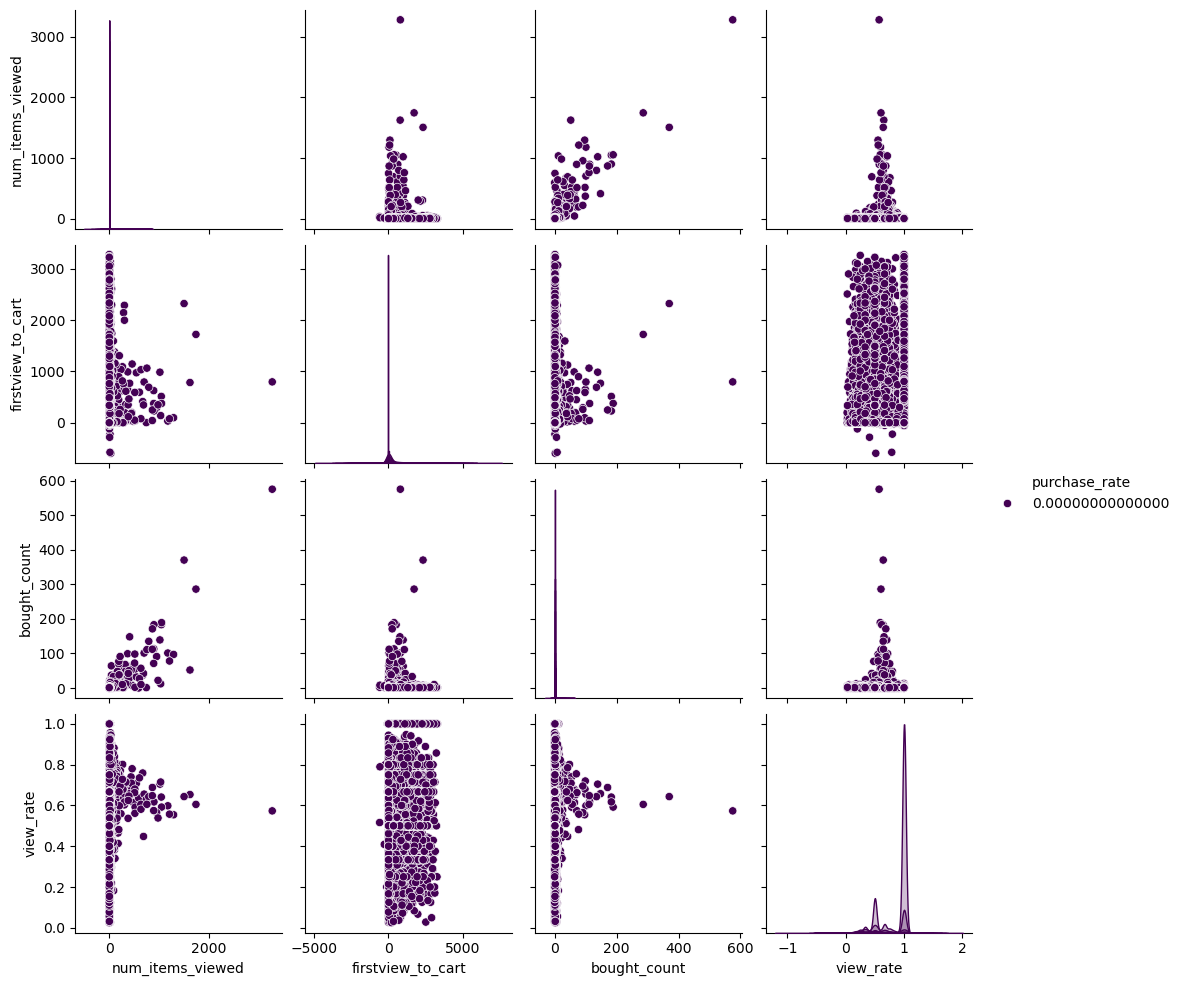

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

sns.pairplot(data_ml,
             x_vars=['num_items_viewed', 'firstview_to_cart', 'bought_count', 'view_rate'],
             y_vars=['num_items_viewed', 'firstview_to_cart', 'bought_count', 'view_rate'],
             hue='purchase_rate',
             palette='viridis')
plt.show()

In [ ]:
data_ml.drop('visitorid', axis=1).corr().style.background_gradient(cmap='coolwarm',axis = None)

,num_items_viewed,view_count,firstview_to_cart,cart_to_transaction,bought_count,purchased,view_rate,purchase_rate
num_items_viewed,1.000000,0.990986,0.009102,-0.003357,0.856763,0.096955,-0.048304,-0.017035
view_count,0.990986,1.000000,0.008717,0.006059,0.852426,0.109338,-0.082295,-0.018429
firstview_to_cart,0.009102,0.008717,1.000000,0.003404,0.016016,nan,0.012673,0.018386
cart_to_transaction,-0.003357,0.006059,0.003404,1.000000,-0.008116,nan,-0.057444,-0.047596
bought_count,0.856763,0.852426,0.016016,-0.008116,1.000000,0.178404,-0.085816,0.087444
purchased,0.096955,0.109338,nan,nan,0.178404,1.000000,-0.466460,0.660358
view_rate,-0.048304,-0.082295,0.012673,-0.057444,-0.085816,-0.466460,1.000000,-0.045358
purchase_rate,-0.017035,-0.018429,0.018386,-0.047596,0.087444,0.660358,-0.045358,1.000000


In [ ]:
data_ml = data_ml.dropna(subset=['view_rate'])

In [ ]:
data_ml = data_ml[~np.isinf(data_ml['purchase_rate'])]

In [ ]:
df=data_ml.drop(['visitorid', 'view_count', 'purchased'], axis=1)
df=df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,num_items_viewed,firstview_to_cart,cart_to_transaction,bought_count,view_rate,purchase_rate
0,2,0.270165,0.040662,2,0.500000,0.5
1,1,NaN,NaN,0,1.000000,0.0
2,1,NaN,NaN,0,0.333333,0.0
3,1,NaN,NaN,0,0.500000,0.0
4,5,NaN,NaN,0,0.714286,0.0


In [ ]:
df.isnull().sum()

num_items_viewed         0
firstview_to_cart      479
cart_to_transaction    479
bought_count             0
view_rate                0
purchase_rate            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer1=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1000)
imputer1.fit(df[['firstview_to_cart']])
df['firstview_to_cart'] = imputer1.transform(df[['firstview_to_cart']])

imputer2=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=2000)
imputer2.fit(df[['cart_to_transaction']])
df['cart_to_transaction'] = imputer2.transform(df[['cart_to_transaction']])


In [ ]:
df.isnull().sum()

num_items_viewed       0
firstview_to_cart      0
cart_to_transaction    0
bought_count           0
view_rate              0
purchase_rate          0
dtype: int64

In [ ]:
X = df.drop('purchase_rate', axis=1)
X.head()

,num_items_viewed,firstview_to_cart,cart_to_transaction,bought_count,view_rate
0,2,0.270165,0.040662,2,0.500000
1,1,-1000.000000,2000.000000,0,1.000000
2,1,-1000.000000,2000.000000,0,0.333333
3,1,-1000.000000,2000.000000,0,0.500000
4,5,-1000.000000,2000.000000,0,0.714286


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_array, columns=X.columns)


In [ ]:
y=df['purchase_rate']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

class Models:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def linear_reg(self):
        model1 = LinearRegression()
        model1.fit(self.X_train, self.y_train)
        y_pred = model1.predict(self.X_test)
        r2 = r2_score(self.y_test, y_pred)
        return r2

    def poli_reg(self):
        degree = 2
        poly = PolynomialFeatures(degree=degree)
        X_train_reshaped = self.X_train.reshape(-1, 1) if len(self.X_train.shape) == 1 else self.X_train
        X_test_reshaped = self.X_test.reshape(-1, 1) if len(self.X_test.shape) == 1 else self.X_test
        X_train_poly = poly.fit_transform(X_train_reshaped)
        X_test_poly = poly.transform(X_test_reshaped)

        model2 = LinearRegression()
        model2.fit(X_train_poly, self.y_train)
        y_pred = model2.predict(X_test_poly)
        r2 = r2_score(self.y_test, y_pred)
        return r2

    def random_forest(self):
        model_rf = RandomForestRegressor()
        model_rf.fit(self.X_train, self.y_train)

        y_pred = model_rf.predict(self.X_test)
        r2 = r2_score(self.y_test, y_pred)
        return r2

    def xgbrf_reg(self):
        model_xgbrf = XGBRFRegressor()
        model_xgbrf.fit(self.X_train, self.y_train)

        y_pred = model_xgbrf.predict(self.X_test)
        r2 = r2_score(self.y_test, y_pred)
        return r2

    def create_nn_model(self):
        input_dim = self.X_train.shape[1]

        model = Sequential()
        model.add(Dense(10, input_dim=input_dim, activation='relu'))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])
        return model

In [ ]:
my_models = Models(X_train, X_test, y_train, y_test)
r2 = my_models.linear_reg()
print(r2)

0.369512388728084


In [ ]:
r2_poly = my_models.poli_reg()
print(r2_poly)

0.4299418934183795


In [ ]:
r2_rf = my_models.random_forest()
print(r2_rf)

0.992892888867796


In [ ]:
r2_xgb= my_models.xgbrf_reg()
print(r2_xgb)

0.9694021168821112


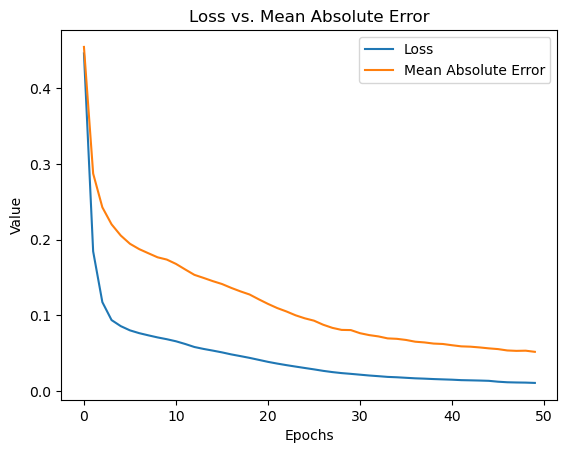

In [ ]:
history = my_models.create_nn_model().fit(X_train,y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

loss = history.history['loss']
mae = history.history['mean_absolute_error']

plt.plot(loss, label='Loss')
plt.plot(mae, label='Mean Absolute Error')
plt.title('Loss vs. Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()



In [ ]:
model = my_models.create_nn_model()
model.fit(X_train, y_train, epochs=10, batch_size=32,verbose=0)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R-squared (R²): 0.6720486097026722


In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search_nn(models):
    param_grid = {
        'epochs': [10, 20],
        'batch_size': [16, 32],
        'optimizer': ['adam', 'sgd'],
    }

    model = KerasRegressor(model=my_models.create_nn_model(), verbose=0)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')

    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Test R²: {r2}")

    return grid_search.best_estimator_

In [ ]:
best_model = grid_search_nn(my_models.create_nn_model())

Best parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'sgd'}
Test R²: 0.8300466740105831
